In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm

%matplotlib inline

seed = 42

df=pd.read_csv("kag_risk_factors_cervical_cancer.csv")
len(df)

858

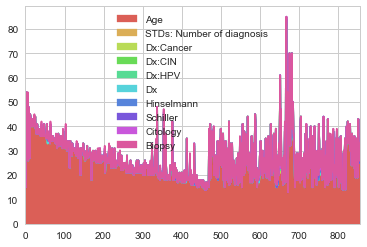

In [56]:
df.plot.area()

In [57]:
#Replace ?s with -1 to represent missing values
df=df.replace("?", 0)
# imp = Imputer(missing_values="?", strategy='most_frequent', axis=0)
# imp.fit(df)
# df = imp.transform(df)

In [58]:
#Split data into training and testing sets
y=df["Biopsy"]
X=df.drop(["Biopsy"], axis=1)
#20% of dataset goes to test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=seed)

In [32]:
#Standardize the data
X_scaled = preprocessing.scale(X_train)

In [33]:
X_scaled.mean()

-1.4389896095932891e-17

In [34]:
X_scaled.std()

0.9561828874675149

In [35]:
#Train the random forest classifier using training data
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=seed)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [36]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.94186046511627908

In [37]:
#Evaulating which features the classifier finds important for making its decisions
feats = rfc.feature_importances_

#Create new instance of dataframe
feat_importances=pd.DataFrame()

#set columns in datafram to features and their importances
feat_importances["feature"]=X.columns
feat_importances["rfc"]=feats

#Display data
feat_importances

,feature,rfc
0,Age,0.108359
1,Number of sexual partners,0.043818
2,First sexual intercourse,0.090490
3,Num of pregnancies,0.043802
4,Smokes,0.000732
5,Smokes (years),0.008442
6,Smokes (packs/year),0.012189
7,Hormonal Contraceptives,0.018789
8,Hormonal Contraceptives (years),0.073255
9,IUD,0.007286


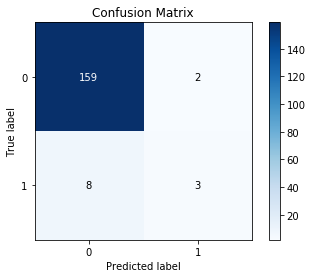

In [38]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

In [39]:
np.sum(y_test.values==1), np.sum(y_test.values==0)

(11, 161)

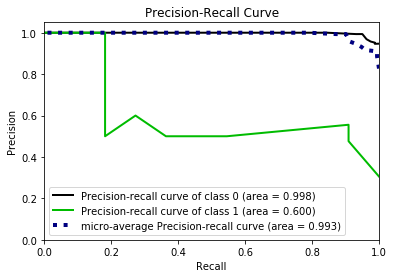

In [40]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=rfc.predict_proba(X_test))
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       161
          1       0.60      0.27      0.37        11

avg / total       0.93      0.94      0.93       172



In [113]:
#Train the random forest classifier using training data
from sklearn.ensemble import RandomForestClassifier
rfcw=RandomForestClassifier(random_state=seed, class_weight={0:20, 1:0.5})
rfcw.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 20, 1: 0.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       161
          1       0.75      0.27      0.40        11

avg / total       0.94      0.95      0.94       172



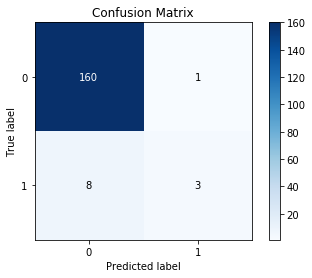

In [114]:
rfcw_pred = rfcw.predict(X_test)
print(classification_report(y_test, rfcw_pred))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=rfcw_pred)
plt.show()

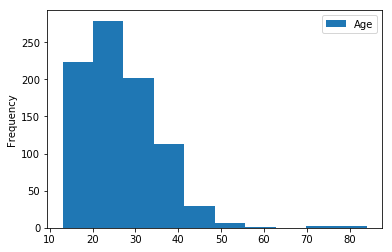

In [115]:
df.plot.hist(x="Biopsy", y="Age")

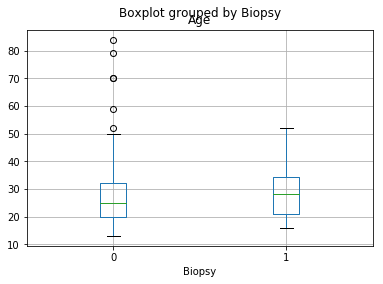

In [116]:
df.boxplot(column="Age", by="Biopsy")

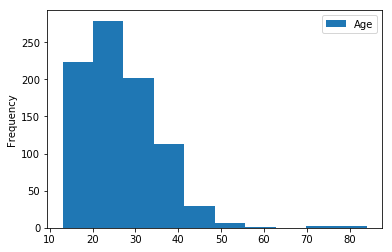

In [117]:
df.plot.hist(x="Biopsy", y="Age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd92240>]], dtype=object)

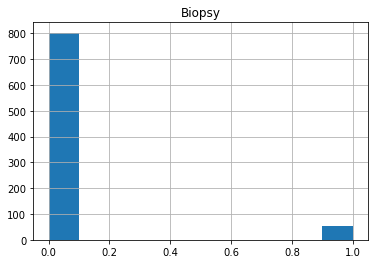

In [37]:
df.hist(column="Biopsy")

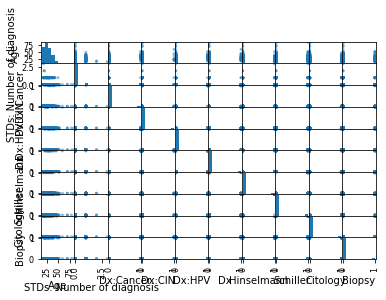

In [52]:
scatter_matrix(df)
plt.show()

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1),
    GradientBoostingClassifier(random_state=42)
    ]

names = ["KNC", "Linear SVC", "SVC", "RFC", "MLP", "GBC"]


clfs = list(zip(classifiers, names))

for clf, n in clfs:
    clf.fit(X_train, y_train)
    preds = np.rint(clf.predict(X_test))
    print(n, accuracy_score(y_test, preds))

vclf = VotingClassifier(estimators=clfs, voting="hard")

KNC 0.93023255814
Linear SVC 0.936046511628
SVC 0.936046511628
RFC 0.941860465116
MLP 0.953488372093
GBC 0.953488372093


NameError: name 'classifiers' is not defined

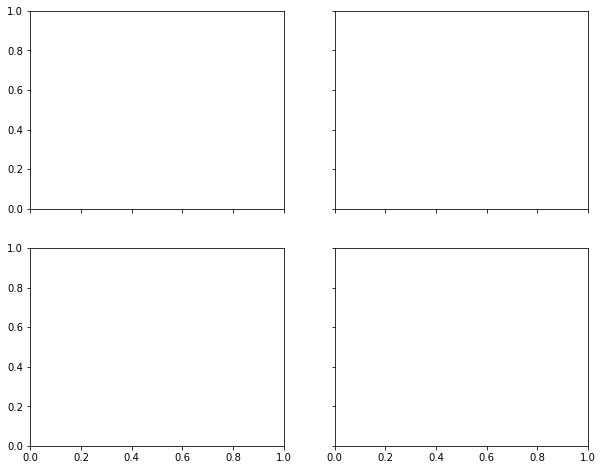

In [59]:
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import Product
from itertools import product

pca = PCA(n_components=2)

pca.fit(X_train)

X_train2d = pca.transform(X_train)

# Plotting decision regions
x_min, x_max = X_train2d[:, 0].min() - 1, X_train2d[:, 0].max() + 1
y_min, y_max = X_train2d[:, 1].min() - 1, X_train2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        classifiers,
                        names):

    clf.fit(X_train2d, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [43]:
#Train the SVM using training data
svmc=svm.SVC()
svmc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/lauramann/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.94      1.00      0.97       161
          1       0.00      0.00      0.00        11

avg / total       0.88      0.94      0.91       172



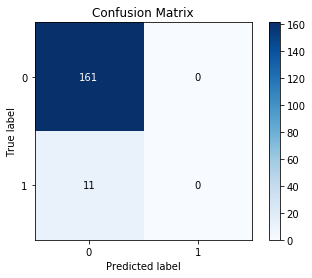

0.94186046511627908

In [62]:
svmc_pred = svmc.predict(X_test)
print(classification_report(y_test, svmc_pred))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=svmc_pred)
plt.show()#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(X_test)
accuracy_score(y_pred, y_test)

In [48]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.94186046511627908

TypeError: unhashable type: 'slice'

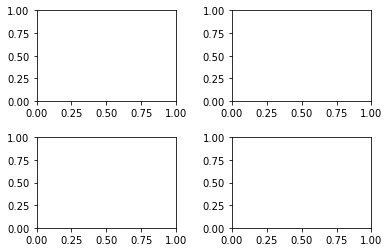

In [47]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [86]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

0.95930232558139539

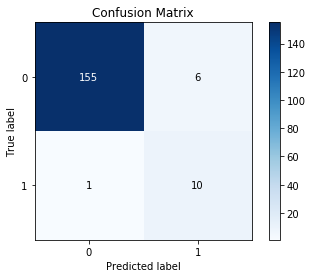

In [87]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=gbcy_pred)
plt.show()

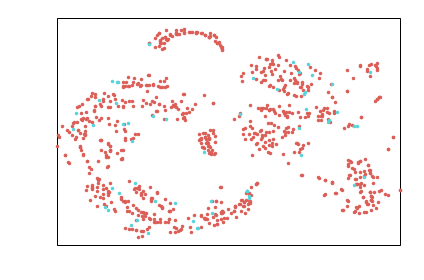

In [61]:
from sklearn import datasets
import hypertools as hyp

hyp.plot(X, '.', reduce='TSNE', group=y, ndims=2)
# hyp.plot(X, '.', reduce='TSNE', n_clusters=10, ndims=2)

IndexError: list index out of range

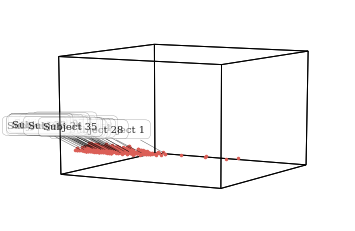

In [42]:

# simulate labels
labels=[]
for idx,i in enumerate(df):
    tmp=[]
    for iidx,ii in enumerate(i):
        if iidx==0:
            tmp.append('Subject ' + str(idx))
        else:
            tmp.append(None)
    labels.append(tmp)

# plot
hyp.plot(df, '.', labels=labels)

In [41]:
# process the data
X = hyp.analyze(X, normalize='false', reduce='TSNE', ndims=10,
                align='hyper')

# plot it
hyp.plot(X, '.', legend=['Group A', 'Group B', 'Group C'])

AssertionError: scale_type must be across, within, row or none.